In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
pca_d <- '/oak/stanford/groups/mrivas/ukbb24983/sqc/population_stratification_w24983_20200313/pca_20200817'

In [22]:
evec_f <- file.path(pca_d, 'ukb24983_%s.eigenvec')
evec_alleles_f <- file.path(pca_d, 'ukb24983_%s.eigenvec.allele.zst')


In [51]:
evec_f

[1] "/oak/stanford/groups/mrivas/ukbb24983/sqc/population_stratification_w24983_20200313/pca_20200817/ukb24983_%s.eigenvec"

In [12]:
pop <- 'white_british'


In [13]:
evec <- fread(sprintf(evec_f, pop), colClasses=c('#FID'='character', 'IID'='character')) %>%
rename('FID'='#FID')


In [24]:
evec_alleles <- fread(cmd=paste('zstdcat', sprintf(evec_alleles_f, pop)), colClasses=c('#CHROM'='character', 'ID'='character')) %>%
rename('CHROM'='#CHROM')


In [14]:
p <- evec %>% 
ggplot(aes(x=PC1, y=PC2)) +
stat_density_2d(aes(fill = ..level..), geom = "polygon") +
theme_bw()

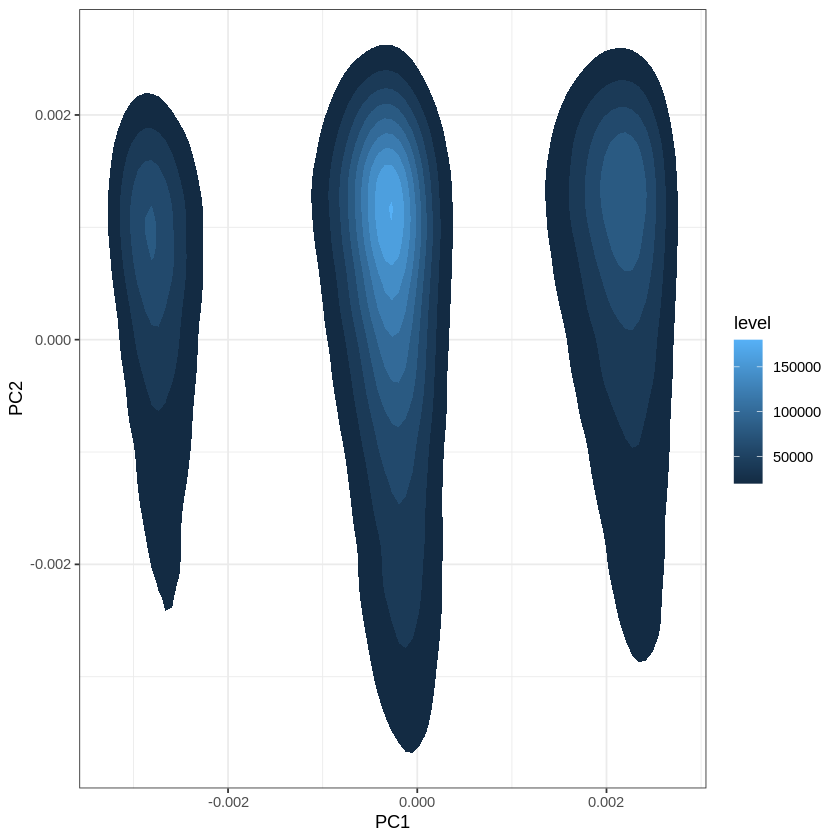

In [15]:
p

In [34]:
233616 * 2

[1] 467232

In [33]:
evec_alleles %>% dim()

[1] 467232     48

In [32]:
evec_alleles %>%
select(ID) %>% pull() %>% unique() %>% length()

[1] 233616

In [41]:
evec_alleles %>%
filter(ALT1 == ALT, A1 == ALT) %>%
mutate(abs_PC1 = abs(PC1)) %>%
select(abs_PC1) %>%
summary()

    abs_PC1        
 Min.   : 0.00000  
 1st Qu.: 0.01890  
 Median : 0.04007  
 Mean   : 0.06728  
 3rd Qu.: 0.06844  
 Max.   :25.46180  

In [42]:
evec_alleles %>%
filter(ALT1 == ALT, A1 == ALT) %>%
arrange(-abs(PC1)) %>% head(100)

CHROM,POS,ID,REF,ALT1,ALT,A1,AX,PC1,PC2,⋯,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,8661534,rs12547493,T,C,C,C,T,25.4618,1.532580,⋯,-0.03733320,0.098843900,0.02703750,0.03768280,0.08106880,-0.06346750,0.0439513,-0.05330070,-0.19334500,-0.11376800
8,8379107,rs7826660,C,A,A,A,C,25.3469,1.319930,⋯,-0.08613090,0.076455900,0.10647700,-0.00944706,0.07672260,-0.12687400,-0.0894347,0.02717320,0.04046430,-0.01894710
8,11045161,rs7819412,G,A,A,A,G,-24.4504,-1.400150,⋯,0.02894470,0.044574600,-0.05957420,-0.05737150,0.00377354,-0.04059510,-0.0370403,-0.03056320,-0.00392719,0.00887570
8,9084341,rs2929453,T,C,C,C,T,-24.0146,-1.585840,⋯,0.01685820,-0.087602300,-0.12910500,0.13845400,0.07417130,-0.10108600,-0.0891405,-0.12641500,0.05209420,0.04017110
8,11396874,rs2248325,A,G,G,G,A,-23.8449,-1.366630,⋯,0.03565560,-0.035131600,-0.08746350,0.02143470,0.08285040,0.01396560,-0.0563548,-0.05361500,0.03062450,-0.05217300
8,9818065,rs591346,C,T,T,T,C,-23.3825,-1.136920,⋯,-0.11835600,-0.163718000,0.22245800,0.02720840,-0.11907700,-0.15465200,0.1223470,-0.02352560,0.02028720,0.08078330
8,11831948,rs7461062,T,C,C,C,T,22.6560,0.908457,⋯,-0.06732460,-0.105255000,-0.01724550,-0.00684241,-0.12794500,-0.07842430,0.2181750,0.16412500,0.10967100,-0.01038460
8,11525435,rs11250157,G,A,A,A,G,22.5084,1.045220,⋯,-0.16750200,-0.026742500,-0.01444330,0.01152190,-0.07414600,-0.04667160,0.0359496,0.09354550,0.08963490,0.00836383
8,10251265,rs11249999,T,C,C,C,T,22.1274,1.253080,⋯,0.01564780,-0.133425000,-0.05162850,-0.01960960,0.04231650,-0.05513400,-0.1702140,0.05512590,0.10687800,-0.13253500


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1188 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


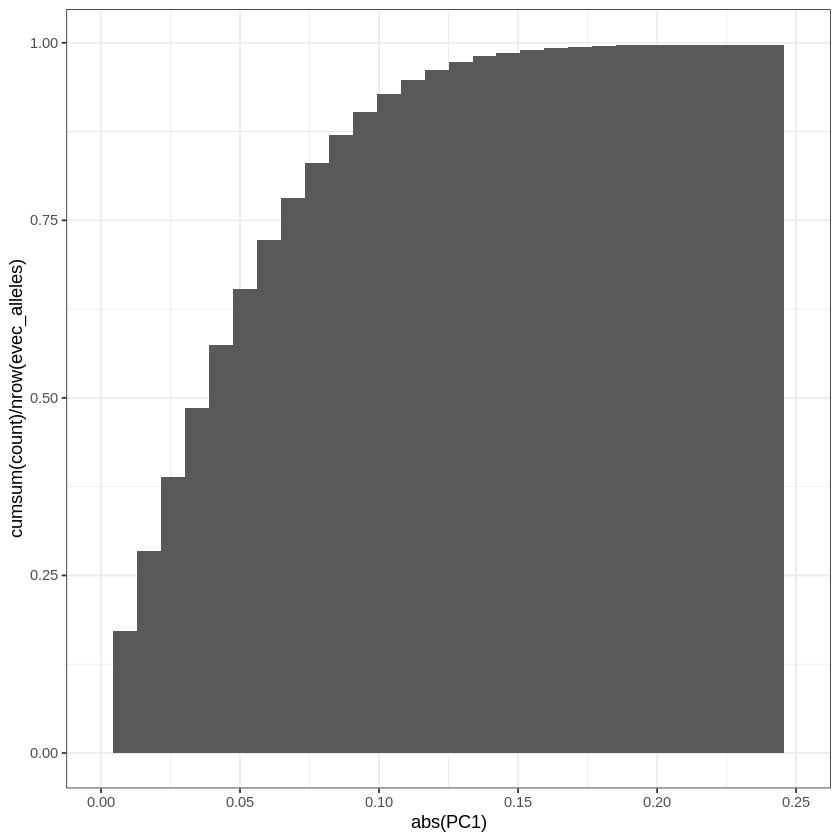

In [49]:
evec_alleles %>%
ggplot(aes(x = abs(PC1))) +
geom_histogram(aes(y = cumsum(..count..) / nrow(evec_alleles))) +
xlim(0, .25) +
theme_bw()

In [19]:
df <- '/oak/stanford/groups/mrivas/ukbb24983/phenotypedata/master_phe/master.20200522.phe' %>%
fread(colClasses=c('#FID'='character', 'IID'='character'), select=c('#FID', 'IID', paste0('PC', 1:10), paste0('Global_PC', 1:10), 'population')) %>%
rename('FID'='#FID')


In [3]:
df %>% count(population)

population,n
<chr>,<int>
african,6497
e_asian,1154
e_asian_outlier,618
non_british_white,24905
others,28467
s_asian,7885
s_asian_outlier,77
white_british,337138
NA,110029


In [20]:
p_WB_global <- df %>% 
drop_na(population) %>%
filter(!str_detect(population, 'outlier')) %>%
filter(population == 'white_british') %>%
ggplot(aes(x=Global_PC1, y=Global_PC2)) +
stat_density_2d(aes(fill = ..level..), geom = "polygon") +
theme_bw()



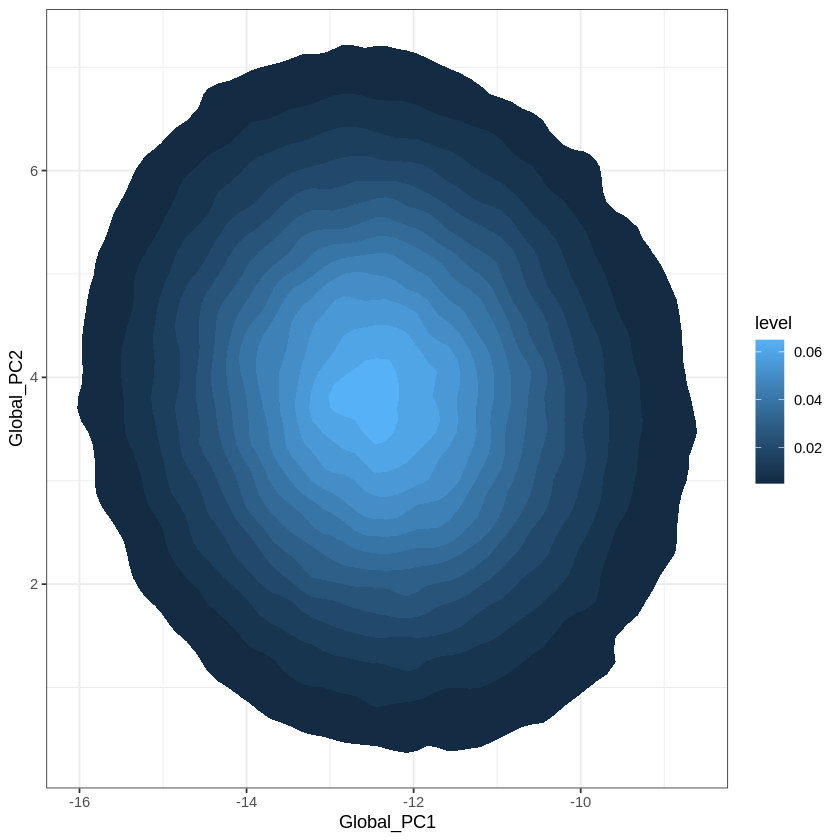

In [21]:
p_WB_global